## Creating a DataFrame

In [1]:
# Setup
import pandas as pd

In [3]:
#making data frame
test_users_list = [
    ['Craig', 'Dennis', 42.42],
    ['Treasure', 'Porth', 25.00]
]

pd.DataFrame(test_users_list)

,0,1,2
0,Craig,Dennis,42.42
1,Treasure,Porth,25.00


In [4]:
#dataframe with indexes
pd.DataFrame(test_users_list, index=['craigsdennis', 'treasure'],
            columns=['first_name', 'last_name', 'balance'])

,first_name,last_name,balance
craigsdennis,Craig,Dennis,42.42
treasure,Treasure,Porth,25.00


In [5]:
# creating df from dictionary
# Default expected Dictionary layout is column name, to ordered values
test_user_data = {
    'first_name': ['Craig', 'Treasure'],
    'last_name': ['Dennis', 'Porth'],
    'balance': [42.42, 25.00]
}

pd.DataFrame(test_user_data)

,first_name,last_name,balance
0,Craig,Dennis,42.42
1,Treasure,Porth,25.00


In [6]:
#add index to above df
pd.DataFrame(test_user_data, index=['craigsdennis', 'treasure'])

,first_name,last_name,balance
craigsdennis,Craig,Dennis,42.42
treasure,Treasure,Porth,25.00


In [12]:
#using from_dict method allows for a lot more functionality
#example the orient keyword changes the way the dictionary is read "columns" is another possible value for the orient keyword
by_username = {
    'craigsdennis': {
        'first_name': 'Craig',
        'last_name': 'Dennis',
        'balance': 42.42
    },
    'treasure': {
        'first_name': 'Treasure',
        'last_name': 'Porth',
        'balance': 25.00
    }
}

pd.DataFrame.from_dict(by_username, orient='index')

,first_name,last_name,balance
craigsdennis,Craig,Dennis,42.42
treasure,Treasure,Porth,25.00


## Accessing a DataFrame

In [14]:
# Setup
import pandas as pd

test_user_data = {
    'first_name': ['Craig', 'Treasure', 'Ashley', 'Guil'],
    'last_name': ['Dennis', 'Porth', 'Boucher', 'Hernandez'],
    'balance': [42.42, 25.00, 2.02, 87.00]
}
test_user_names = ['craigsdennis', 'treasure', 'lindsay2000', 'guil']

users = pd.DataFrame(test_user_data, index=test_user_names)

users

,first_name,last_name,balance
craigsdennis,Craig,Dennis,42.42
treasure,Treasure,Porth,25.00
lindsay2000,Ashley,Boucher,2.02
guil,Guil,Hernandez,87.00


In [15]:
#each column in dataframe is a series
#code to get just 'balance' series
balances = users['balance']
balances

craigsdennis    42.42
treasure        25.00
lindsay2000      2.02
guil            87.00
Name: balance, dtype: float64

In [16]:
#the series also has a property of name set to the column label (weird but okay)
balances.name

'balance'

In [21]:
#row is returned as a series
users.loc['guil']

first_name         Guil
last_name     Hernandez
balance              87
Name: guil, dtype: object

In [23]:
#name property becomes the 'guil' value
users.loc['guil'].name

'guil'

In [24]:
#rows can be accessed by index
users.iloc[1]

first_name    Treasure
last_name        Porth
balance             25
Name: treasure, dtype: object

In [25]:
# This is called chaining
# CAREFUL: This first retrieves the column `Series`
#  and then uses the label.
users['first_name']['craigsdennis']

'Craig'

In [26]:
#loc allows you to work with both axises
users.loc['craigsdennis', 'first_name']

'Craig'

In [27]:
# to be even more explicit that you are trying to get a single scalar value
users.at['craigsdennis', 'first_name']

'Craig'

In [28]:
# Slicing is similar to NumPy fancy slicing
# All rows and the following ordered columns as a list (fancy, eh?)
users.loc[:, ['balance', 'last_name']]

,balance,last_name
craigsdennis,42.42,Dennis
treasure,25.00,Porth
lindsay2000,2.02,Boucher
guil,87.00,Hernandez


In [29]:
# using slice with loc values are inclusive
# All rows starting with 'treasure' up to and including 'lindsay2000'
#  and all the columns
users.loc['treasure':'lindsay2000', :]

,first_name,last_name,balance
treasure,Treasure,Porth,25.00
lindsay2000,Ashley,Boucher,2.02


In [30]:
# when using slice with iloc results are exclusive
# All rows starting with the 2nd up until but not including the 3rd
#  and all columns starting at the second until the end
users.iloc[1:2, 1:]

,last_name,balance
treasure,Porth,25.0


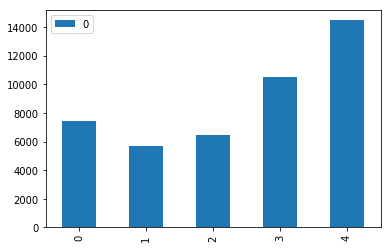

In [47]:
# fun little experiment to make a plot
import matplotlib.pyplot as plt
import numpy as np
numbers = pd.DataFrame([7416,5704,6444,10512,14473])
numbers
ax = numbers.plot.bar()